In [1]:
from flair.data import Sentence
from flair.nn import Classifier

# make a sentence
sentence = Sentence('George Washington went to Washington.')

# load the NER tagger
tagger = Classifier.load('ner-large')

# run NER over sentence
tagger.predict(sentence)

# print the sentence with all annotations
print(sentence)

2024-05-19 21:56:23.411070: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-19 21:56:24.054925: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 21:56:24.054983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 21:56:24.164221: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-19 21:56:24.311074: I tensorflow/core/platform/cpu_feature_guar

2024-05-19 21:57:28,536 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
Sentence[6]: "George Washington went to Washington." → ["George Washington"/PER, "Washington"/LOC]


In [2]:
# Read csv file
import pandas as pd
df = pd.read_csv('GoogleVision.csv')
df.head()

,Image Name,Extracted Text
0,PRS208C4018608,"অধ্যাপক ডাঃ বেগম হোসনে আরা\nএমবিবিএস, এফসিপিএস..."
1,PRS208C4018765,"ডাঃ) সৈয়দ থায়রুল আমিন\n- ডিসিএইচ (গ্লাসগো), ..."
2,PRS208C4021562,14\nIBN SINA\nPar HD\nIBN SINA MEDICAL COLLEGE...
3,PRS208C4021874,"NA\nIBN SINA MEDICAL COLLEGE HOSPITAL\n1/1-B, ..."
4,PRS208C4024487,FAMOUS\nHospital & Diagnostic Center Ltd.\nKon...


In [3]:
for index, row in df[:5].iterrows():
    sentence = Sentence(row['Extracted Text'])
    tagger.predict(sentence)
    print(sentence)
    for label in sentence.labels:
        print(f"\t{label}")
        # print(f"\t{label.data_point.text}")
        # print(f"{label.value} with confidence score {label.score}")
    print('')

Sentence[218]: "অধ্যাপক ডাঃ বেগম হোসনে আরা এমবিবিএস, এফসিপিএস, এমএস (অবসঃ ও গাইনী) ল্যাপারোস্কোপিক সার্জন প্রসূতি ও স্ত্রীরোগ বিশেষজ্ঞ প্রাক্তন নির্বাহী পরিচালক ও বিভাগীয় প্রধান, প্রসূতি ও স্ত্রীরোগ বিভাগ ইনস্টিটিউট অব চাইল্ড এন্ড মাদার হেল্থ (আই সি এম এইচ), ঢাকা বিভাগীয় প্রধান, প্রসূতি ও স্ত্রীরোগ বিশেষজ্ঞ ঢাকা সেন্ট্রাল ইন্টারন্যাশনাল মেডিকেল কলেজ এন্ড হাসপাতাল 30 MAR 2024 Tut 140780 PROF. DR. BEGUM HOSNE ARA MBBS, FCPS, MS (Obs & Gynae) Laparoscopic Surgeon Obstetrician and Gynaecologist Ex. Executive Director & Head of the Department, Obs & Gynae Institute of Child and Mother Health (ICMH), Dhaka) Head of the Department, Obs & Gynae Specialist Dhaka Central International Medical College & Hospital Khadiza thatany 23 c.mp 23/2 m-6ys. Paul Oto RIVIE RX কি Folison os 4 ১+০+১ - ১৮টি TH. Kakearal px oto+ ১ - blo To partonix 204 oto +১ - ১৮ মাটি 30/03/24 LABAID SPECINI 17 HESPIT ল্যাবএইড স্পেশালাইজড হাসপাতাল বাড়ি ৬, রোড ৪, ধানমণ্ডি, ঢাকা ১২০৫, সিরিয়ালের জন্য হটলাইন: ১০৬০৬ মোবাইল: ০১৭

In [4]:
from fuzzywuzzy import process
LABEL_SCORE_THRESHOLD = 0.0
FUZZY_MATCH_THRESHOLD = 0

# Read .xlsx file
df_phy_db = pd.read_excel('500 PRS + Slip Image & Data/Physician Database 500 PRS.xlsx')
df_pres_db = pd.read_excel('500 PRS + Slip Image & Data/500 PRS + Slip Data.xlsx', sheet_name='300 PRS Data')

# Get PhyID to PhyNM dict from df_phy_db
phy_id_to_nm = dict(zip(df_phy_db['PHY_ID'], df_phy_db['PHY_NM']))
predict_presID_to_phyID = {}

for index, row in df.iterrows():
    sentence = Sentence(row['Extracted Text'])
    tagger.predict(sentence)
    print(sentence)
    # Max Heap to store predicted physician ID
    matches = []
    for label in sentence.labels:
        if label.value == 'PER' and label.score >= LABEL_SCORE_THRESHOLD:
            print(f"\t{label.value} with confidence score {label.score}")
            print(f"\t{label.data_point.text}")
            # print(f"\t{process.extractOne(label.data_point.text, phy_id_to_nm, score_cutoff=FUZZY_MATCH_THRESHOLD)}")
            # Get the most similar physician name from the database
            extraction = process.extractOne(label.data_point.text, phy_id_to_nm, score_cutoff=FUZZY_MATCH_THRESHOLD)
            if extraction:
                matches.append(extraction)
    matches.sort(key=lambda x: x[1], reverse=True)
    print(matches)
    print('')
    # Get the most similar physician name from the database
    if matches:
        predict_presID_to_phyID[row['Image Name']] = matches[0]
    else:
        predict_presID_to_phyID[row['Image Name']] = None

print(predict_presID_to_phyID)

Sentence[218]: "অধ্যাপক ডাঃ বেগম হোসনে আরা এমবিবিএস, এফসিপিএস, এমএস (অবসঃ ও গাইনী) ল্যাপারোস্কোপিক সার্জন প্রসূতি ও স্ত্রীরোগ বিশেষজ্ঞ প্রাক্তন নির্বাহী পরিচালক ও বিভাগীয় প্রধান, প্রসূতি ও স্ত্রীরোগ বিভাগ ইনস্টিটিউট অব চাইল্ড এন্ড মাদার হেল্থ (আই সি এম এইচ), ঢাকা বিভাগীয় প্রধান, প্রসূতি ও স্ত্রীরোগ বিশেষজ্ঞ ঢাকা সেন্ট্রাল ইন্টারন্যাশনাল মেডিকেল কলেজ এন্ড হাসপাতাল 30 MAR 2024 Tut 140780 PROF. DR. BEGUM HOSNE ARA MBBS, FCPS, MS (Obs & Gynae) Laparoscopic Surgeon Obstetrician and Gynaecologist Ex. Executive Director & Head of the Department, Obs & Gynae Institute of Child and Mother Health (ICMH), Dhaka) Head of the Department, Obs & Gynae Specialist Dhaka Central International Medical College & Hospital Khadiza thatany 23 c.mp 23/2 m-6ys. Paul Oto RIVIE RX কি Folison os 4 ১+০+১ - ১৮টি TH. Kakearal px oto+ ১ - blo To partonix 204 oto +১ - ১৮ মাটি 30/03/24 LABAID SPECINI 17 HESPIT ল্যাবএইড স্পেশালাইজড হাসপাতাল বাড়ি ৬, রোড ৪, ধানমণ্ডি, ঢাকা ১২০৫, সিরিয়ালের জন্য হটলাইন: ১০৬০৬ মোবাইল: ০১৭

### Testing Accuracy

In [5]:
actual_presID_to_phyID = dict(zip(df_pres_db['PRS_ID'], df_pres_db['PHY_ID']))

correct = 0
wrong = 0

for key, value in predict_presID_to_phyID.items():
    # print(f"Predicted: {value[2]} Actual: {actual_presID_to_phyID[key]}")
    if value:
        if value[2] == actual_presID_to_phyID[key]:
            correct += 1
        else:
            wrong += 1

total = correct + wrong
accuracy = correct / total
print(f"Correct: {correct}\nWrong: {wrong} \nTotal: {total} \nAccuracy: {accuracy}")

Correct: 57
Wrong: 40 
Total: 97 
Accuracy: 0.5876288659793815


### TESTING THRESHOLD COMBINATIONS

In [6]:
from fuzzywuzzy import process
import pandas as pd
# Read .xlsx file
df_phy_db = pd.read_excel('500 PRS + Slip Image & Data/Physician Database 500 PRS.xlsx')
df_pres_db = pd.read_excel('500 PRS + Slip Image & Data/500 PRS + Slip Data.xlsx', sheet_name='300 PRS Data')
df = pd.read_csv('GoogleVision.csv')
actual_presID_to_phyID = dict(zip(df_pres_db['PRS_ID'], df_pres_db['PHY_ID']))


def get_accuracy(LABEL_SCORE_THRESHOLD, FUZZY_MATCH_THRESHOLD):
    # Get PhyID to PhyNM dict from df_phy_db
    phy_id_to_nm = dict(zip(df_phy_db['PHY_ID'], df_phy_db['PHY_NM']))
    predict_presID_to_phyID = {}

    for index, row in df.iterrows():
        sentence = Sentence(row['Extracted Text'])
        tagger.predict(sentence)
        # print(sentence)
        # Max Heap to store predicted physician ID
        matches = []
        for label in sentence.labels:
            if label.value == 'PER' and label.score >= LABEL_SCORE_THRESHOLD:
                # print(f"\t{label.value} with confidence score {label.score}")
                # print(f"\t{label.data_point.text}")
                # print(f"\t{process.extractOne(label.data_point.text, phy_id_to_nm, score_cutoff=FUZZY_MATCH_THRESHOLD)}")
                # Get the most similar physician name from the database
                extraction = process.extractOne(label.data_point.text, phy_id_to_nm, score_cutoff=FUZZY_MATCH_THRESHOLD)
                if extraction:
                    matches.append(extraction)
        matches.sort(key=lambda x: x[1], reverse=True)
        # print(matches)
        # print('')
        # Get the most similar physician name from the database
        if matches:
            predict_presID_to_phyID[row['Image Name']] = matches[0]
        else:
            predict_presID_to_phyID[row['Image Name']] = None
        
    correct = 0
    wrong = 0

    for key, value in predict_presID_to_phyID.items():
        # print(f"Predicted: {value[2]} Actual: {actual_presID_to_phyID[key]}")
        if value:
            if value[2] == actual_presID_to_phyID[key]:
                correct += 1
            else:
                wrong += 1

    total = correct + wrong
    accuracy = correct / total
    return accuracy, total

In [8]:
from tqdm import tqdm
import numpy as np
LABEL_SCORE_THRESHOLDS = [0.0, 0.2, 0.4, 0.6, 0.8, 0.99]
FUZZY_MATCH_THRESHOLDS = [0, 50, 60, 70, 80, 90, 95]

accuracy_matrix = np.zeros((len(LABEL_SCORE_THRESHOLDS), len(FUZZY_MATCH_THRESHOLDS)))
total_matrix = np.zeros((len(LABEL_SCORE_THRESHOLDS), len(FUZZY_MATCH_THRESHOLDS)))

for i, LABEL_SCORE_THRESHOLD in enumerate(tqdm(LABEL_SCORE_THRESHOLDS)):
    for j, FUZZY_MATCH_THRESHOLD in enumerate(FUZZY_MATCH_THRESHOLDS):
        accuracy, total = get_accuracy(LABEL_SCORE_THRESHOLD, FUZZY_MATCH_THRESHOLD)
        accuracy_matrix[i][j] = accuracy
        total_matrix[i][j] = total

print(accuracy_matrix)
print(total_matrix)

100%|██████████| 6/6 [06:23<00:00, 63.88s/it]

[[0.58762887 0.6627907  0.68674699 0.75675676 0.76712329 0.86792453
  0.97368421]
 [0.58762887 0.6627907  0.68674699 0.75675676 0.76712329 0.86792453
  0.97368421]
 [0.58762887 0.6627907  0.68674699 0.75675676 0.76712329 0.86792453
  0.97368421]
 [0.58762887 0.67058824 0.69512195 0.76712329 0.77777778 0.86792453
  0.97368421]
 [0.58762887 0.67058824 0.69512195 0.76712329 0.77777778 0.86792453
  0.97368421]
 [0.4893617  0.63013699 0.6969697  0.78947368 0.78947368 0.87804878
  0.96774194]]
[[97. 86. 83. 74. 73. 53. 38.]
 [97. 86. 83. 74. 73. 53. 38.]
 [97. 86. 83. 74. 73. 53. 38.]
 [97. 85. 82. 73. 72. 53. 38.]
 [97. 85. 82. 73. 72. 53. 38.]
 [94. 73. 66. 57. 57. 41. 31.]]


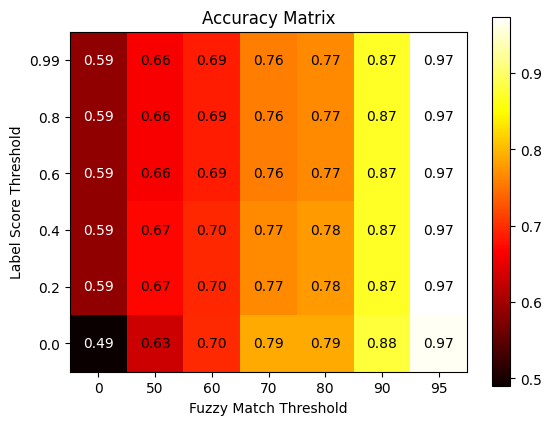

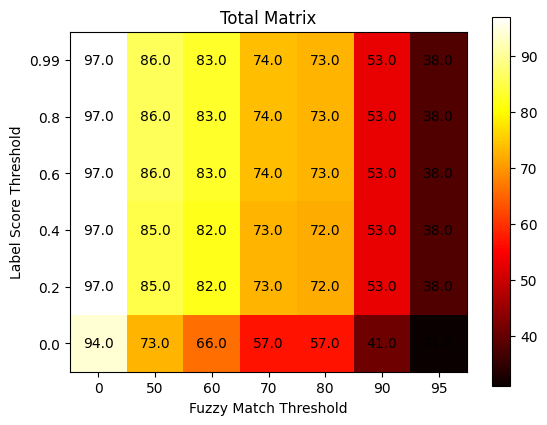

In [14]:
# Plot the accuracy matrix and total matrix as heatmaps
import matplotlib.pyplot as plt
import numpy as np

accuracy_matrix = np.array(accuracy_matrix)
total_matrix = np.array(total_matrix)

fig, ax = plt.subplots()
cax = ax.matshow(accuracy_matrix, cmap='hot')

for (i, j), val in np.ndenumerate(accuracy_matrix):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black' if val > 0.6 else 'white')

plt.xticks(range(len(FUZZY_MATCH_THRESHOLDS)), FUZZY_MATCH_THRESHOLDS)
plt.yticks(range(len(LABEL_SCORE_THRESHOLDS)), LABEL_SCORE_THRESHOLDS[::-1])
plt.xlabel('Fuzzy Match Threshold')
plt.ylabel('Label Score Threshold')
plt.title('Accuracy Matrix')
plt.colorbar(cax)
plt.gca().xaxis.tick_bottom()
plt.show()

# Move xticks to the bottom and ytciks starts from the bottom
fig, ax = plt.subplots()
cax = ax.matshow(total_matrix, cmap='hot')

for (i, j), val in np.ndenumerate(total_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center')

plt.xticks(range(len(FUZZY_MATCH_THRESHOLDS)), FUZZY_MATCH_THRESHOLDS)
plt.yticks(range(len(LABEL_SCORE_THRESHOLDS)), LABEL_SCORE_THRESHOLDS[::-1])
plt.xlabel('Fuzzy Match Threshold')
plt.ylabel('Label Score Threshold')
plt.title('Total Matrix')
plt.colorbar(cax)
plt.gca().xaxis.tick_bottom()
plt.show()